In [1]:
import math
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from functions.functions import EmissionProfile, AbsoluteMetricsPulseDefaultCO2, AbsoluteMetrics, RelativeMetrics
from climate_models.fair_emulator import BackgroundSpeciesQuantities, FaIRClimateModel, GWPStarEquivalentEmissionsFunction, GWPStarClimateModel, LWEClimateModel

C:\Users\t.planes\AppData\Local\miniconda3\envs\AeroMetrics\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Parameters

In [2]:
studied_species = "Aviation NOx ST O3 increase"
start_year = 1940
end_year = 2018
tcre = 0.00045

In [3]:
if studied_species == "Aviation NOx CH4 decrease and induced":
    unit_value = 1
    sensitivity_erf = -0.82
    ratio_erf_rf = 1.18
    efficacy_rf = 1
    efficacy_erf = 1
if studied_species == "Aviation NOx ST O3 increase":
    unit_value = 1
    sensitivity_erf = 34.4e-12 * (14/46) / 10**(-9)
    ratio_erf_rf = 1.37
    efficacy_rf = 1
    efficacy_erf = 1

In [4]:
klower_data_df = read_csv("climate_data/historical_data_from_klower.csv", delimiter=";")
klower_data = klower_data_df.values
klower_data_years = klower_data[:, 0]
klower_data_co2 = klower_data[:, 1]
klower_data_distance = klower_data[:, 2]
aeromaps_data_co2 = klower_data[:, 3]

emission_index_nox = 0.01514
emission_profile = klower_data_co2 / 3.15 * emission_index_nox # [MtNOx]

print(emission_profile)

[0.1558699  0.16836641 0.18182419 0.19638743 0.21210419 0.2290706
 0.24738279 0.26718495 0.28852514 0.31164368 0.33654057 0.36350419
 0.3925826  0.42396806 0.45790089 0.49452527 0.53408152 0.57680997
 0.62295092 0.67279276 0.72662387 0.79722914 0.87797581 0.92642381
 0.96881581 1.03543181 1.12218641 1.32405308 1.49962902 1.57028235
 1.57431968 1.62098933 1.70442756 1.76402629 1.70707105 1.70836876
 1.71173321 1.81410844 1.8763026  1.94157283 1.95518979 1.92207981
 1.94682117 1.97971851 2.11182429 2.17856064 2.30074861 2.40651828
 2.52316261 2.62739829 2.6416447  2.55467784 2.56060119 2.57457421
 2.69738489 2.76305807 2.88811659 2.97605548 3.03474215 3.13262922
 3.29486812 3.16933877 3.17574814 3.1737585  3.37340559 3.5391985
 3.58046446 3.68444195 3.66740094 3.47782353 3.65342792 3.76177957
 3.80249876 3.91057702 4.03360034 4.25388801 4.45962552 4.72274342
 4.96832608]


## Metrics calculation

In [5]:
radiative_forcing, effective_radiative_forcing, temperature = LWEClimateModel(start_year, end_year, emission_profile, studied_species, sensitivity_erf, ratio_erf_rf, tcre)

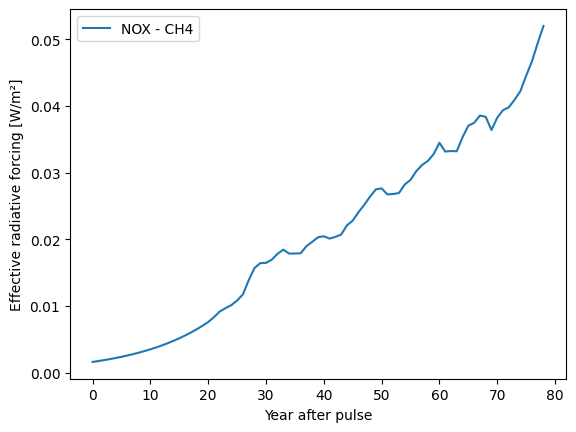

In [6]:
plt.plot(effective_radiative_forcing, label='NOX - CH4')
plt.xlabel('Year after pulse')
plt.ylabel('Effective radiative forcing [W/m²]')
plt.legend()

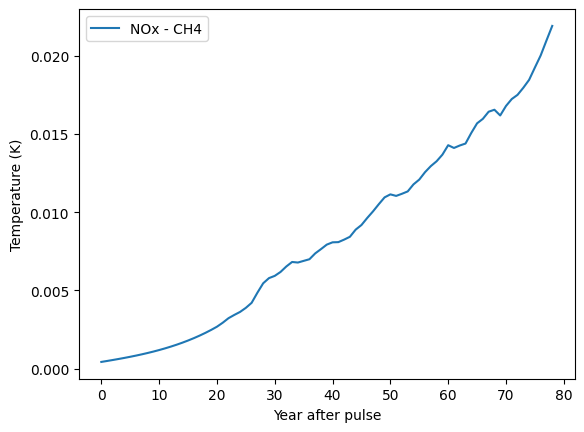

In [7]:
plt.plot(temperature, label='NOx - CH4')
plt.xlabel('Year after pulse')
plt.ylabel('Temperature (K)')
plt.legend()

In [8]:
print(1000*effective_radiative_forcing[65], 1000*effective_radiative_forcing[71], 1000*effective_radiative_forcing[78])

37.053869463188406 39.38419649669565 52.01621394141835
